# How to Navigate iNaturalist

Welcome to my guide on how to Navigate iNaturalist on the Vector Cluster. My name is Ryan Junejo and I was a Vector Research Intern under Graham Taylor's Supervision
for the summer of 2024.

## Navigating to the Dataset

In [1]:
source_dir = '/datasets/inat_comp/'

All the datasets in the Vector Cluster are stored here! They have the 2018, 2019 and 2021 datasets in their respective subfolders

In [2]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

This is a helpful function to explore some of the data to see how it's formatted in it's folders. Let's try this out on the train_val2019 folder in the iNAT 2019 dataset. (It can be used with any folder but I'd recommend only using it on target folders to avoid extremely long outputs)

In [3]:
image_dir = '/datasets/inat_comp/2019/train_val2019'
walk_through_dir(image_dir)

There are 6 directories and 0 images in '/datasets/inat_comp/2019/train_val2019'.
There are 10 directories and 0 images in '/datasets/inat_comp/2019/train_val2019/Amphibians'.
There are 0 directories and 126 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/157'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/160'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/161'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/153'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/158'.
There are 0 directories and 55 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/154'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/159'.
There are 0 directories and 503 images in '/datasets/inat_comp/2019/train_val2019/Amphibians/155'.
There are 0 directories and 503 i

This gives us a good idea of class distributions within different training folders and helps you out. Now let's try visualizing some of the Data.

Random image path: /datasets/inat_comp/2019/train_val2019/Fungi/10/00bef98db52e3d4b6a7324eb59f08182.jpg
Image class: 10
Image height: 800
Image width: 600


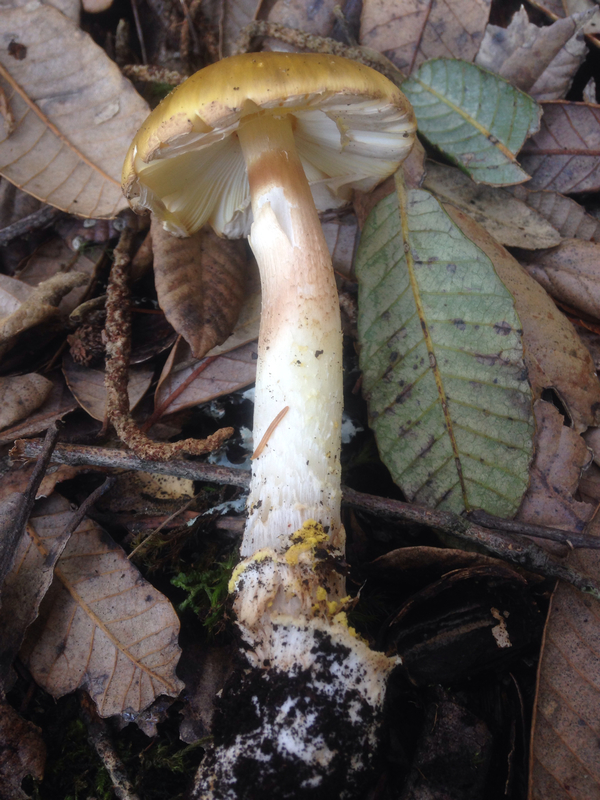

In [4]:
import random
from PIL import Image
from pathlib import Path

#first we convert the image directory into a path.
image_path = Path(image_dir) 
# Set seed
random.seed(15) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

If you have transformations you want to visualize, you can use this format!

In [5]:
from torchvision import transforms
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

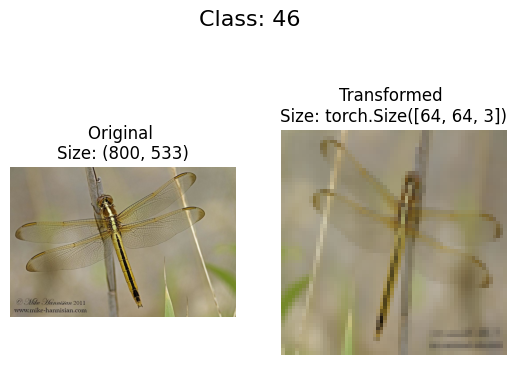

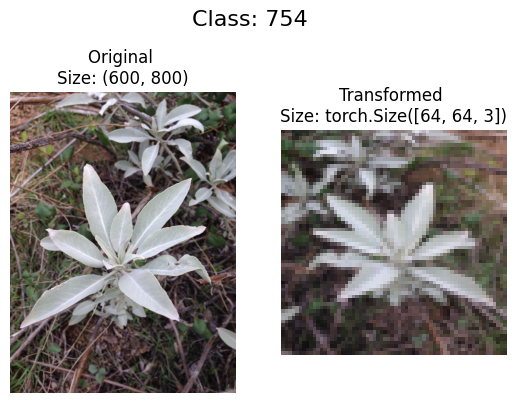

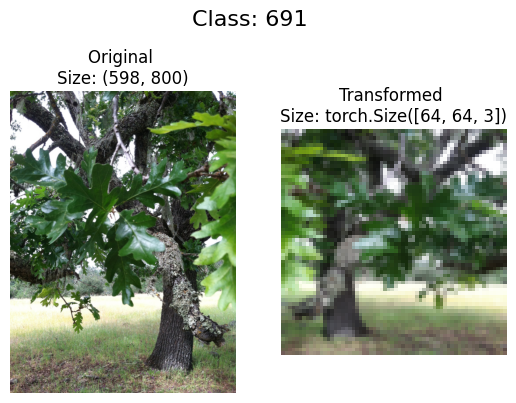

In [6]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_paths, transform, n=3, seed=100):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

for iNaturalist 2019 specifically, we run into the problem of both the training and validation being in the same folder. Thankfully, they provide the respective annotation folders. First let's process their annotations!

In [7]:
train_json = '/datasets/inat_comp/2019/train2019.json'
val_json = '/datasets/inat_comp/2019//val2019.json'

In [8]:
import json

def load_json(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)


train_data = load_json(train_json)
val_data = load_json(val_json)

In [9]:
def get_image_data(annotations):
    images = {img['id']: img['file_name'] for img in annotations['images']}
    img_to_annotations = {ann['image_id']: ann['category_id'] for ann in annotations['annotations']}
    return images, img_to_annotations

train_images, train_img_to_annotations = get_image_data(train_data)
val_images, val_img_to_annotations = get_image_data(val_data)


In [10]:
train_images

{0: 'train_val2019/Plants/400/d1322d13ccd856eb4236c8b888546c79.jpg',
 1: 'train_val2019/Plants/570/15edbc1e2ef000d8ace483e8cc1bd2b6.jpg',
 2: 'train_val2019/Reptiles/167/c87a32e8927cbf4f06d8e08cf19d24fb.jpg',
 3: 'train_val2019/Birds/254/9fcdd1d37e96d8fd94dfdc0885e058a6.jpg',
 4: 'train_val2019/Plants/739/ffa06f951e99de9d220aee2c3309b66c.jpg',
 5: 'train_val2019/Birds/246/ef5109f4c0bd04ca509fadec1c27d8ce.jpg',
 6: 'train_val2019/Insects/25/5ee1691712dffd9e3a1788dbee0d9e3d.jpg',
 7: 'train_val2019/Plants/386/3af7b0ad2e2bc118e38c5fd4c31c2996.jpg',
 8: 'train_val2019/Plants/515/4bfd750cbb32bb0e302ca08b42ee21a7.jpg',
 9: 'train_val2019/Birds/259/353bd26bf9e5e1606a9189f64ed78fa3.jpg',
 10: 'train_val2019/Plants/824/2543714c2f1a8611f1a78ee0f922270d.jpg',
 11: 'train_val2019/Birds/234/dc64a999cacea6eb5ed512ced212a861.jpg',
 12: 'train_val2019/Plants/363/aec09afe1abc6aa7dc70c5067bffff06.jpg',
 13: 'train_val2019/Birds/235/73d440f2157a161fec3e77fba9788730.jpg',
 14: 'train_val2019/Plants/862/e4

In [11]:
train_img_to_annotations

{0: 400,
 1: 570,
 2: 167,
 3: 254,
 4: 739,
 5: 246,
 6: 25,
 7: 386,
 8: 515,
 9: 259,
 10: 824,
 11: 234,
 12: 363,
 13: 235,
 14: 862,
 15: 731,
 16: 325,
 17: 213,
 18: 149,
 19: 131,
 20: 167,
 21: 151,
 22: 751,
 23: 270,
 24: 205,
 25: 415,
 26: 149,
 27: 739,
 28: 8,
 29: 922,
 30: 765,
 31: 856,
 32: 202,
 33: 47,
 34: 521,
 35: 763,
 36: 279,
 37: 540,
 38: 955,
 39: 845,
 40: 196,
 41: 426,
 42: 585,
 43: 158,
 44: 599,
 45: 183,
 46: 201,
 47: 816,
 48: 588,
 49: 209,
 50: 660,
 51: 175,
 52: 931,
 53: 684,
 54: 584,
 55: 170,
 56: 767,
 57: 275,
 58: 227,
 59: 817,
 60: 333,
 61: 339,
 62: 243,
 63: 792,
 64: 159,
 65: 645,
 66: 579,
 67: 32,
 68: 802,
 69: 281,
 70: 690,
 71: 93,
 72: 849,
 73: 603,
 74: 774,
 75: 194,
 76: 82,
 77: 1008,
 78: 446,
 79: 458,
 80: 233,
 81: 471,
 82: 828,
 83: 306,
 84: 834,
 85: 785,
 86: 159,
 87: 252,
 88: 783,
 89: 821,
 90: 853,
 91: 77,
 92: 947,
 93: 104,
 94: 489,
 95: 410,
 96: 465,
 97: 48,
 98: 975,
 99: 923,
 100: 263,
 101: 1

Now we have a cohesive mapping! If you want to see the names that the classes correspond to, you can use the categories file that comes in the iNat folder.

In [12]:
cat_json = '/datasets/inat_comp/2019/categories.json'
cat_data = load_json(cat_json)

In [13]:
cat_data

[{'kingdom': 'Fungi',
  'phylum': 'Basidiomycota',
  'name': 'Amanita vaginata',
  'family': 'Amanitaceae',
  'genus': 'Amanita',
  'order': 'Agaricales',
  'id': 0,
  'class': 'Agaricomycetes'},
 {'kingdom': 'Fungi',
  'phylum': 'Basidiomycota',
  'name': 'Amanita flavoconia',
  'family': 'Amanitaceae',
  'genus': 'Amanita',
  'order': 'Agaricales',
  'id': 1,
  'class': 'Agaricomycetes'},
 {'kingdom': 'Fungi',
  'phylum': 'Basidiomycota',
  'name': 'Amanita calyptroderma',
  'family': 'Amanitaceae',
  'genus': 'Amanita',
  'order': 'Agaricales',
  'id': 2,
  'class': 'Agaricomycetes'},
 {'kingdom': 'Fungi',
  'phylum': 'Basidiomycota',
  'name': 'Amanita jacksonii',
  'family': 'Amanitaceae',
  'genus': 'Amanita',
  'order': 'Agaricales',
  'id': 3,
  'class': 'Agaricomycetes'},
 {'kingdom': 'Fungi',
  'phylum': 'Basidiomycota',
  'name': 'Amanita phalloides',
  'family': 'Amanitaceae',
  'genus': 'Amanita',
  'order': 'Agaricales',
  'id': 4,
  'class': 'Agaricomycetes'},
 {'kingdom

In [14]:
name_to_id = {item['name']: item['id'] for item in cat_data}

In [15]:
name_to_id

{'Amanita vaginata': 0,
 'Amanita flavoconia': 1,
 'Amanita calyptroderma': 2,
 'Amanita jacksonii': 3,
 'Amanita phalloides': 4,
 'Amanita muscaria': 5,
 'Amanita bisporigera': 6,
 'Amanita gemmata': 7,
 'Amanita pantherina': 8,
 'Amanita velosa': 9,
 'Amanita augusta': 10,
 'Amanita rubescens': 11,
 'Cicindela aurulenta': 12,
 'Cicindela punctulata': 13,
 'Cicindela ocellata': 14,
 'Cicindela campestris': 15,
 'Cicindela oregona': 16,
 'Cicindela tranquebarica': 17,
 'Cicindela formosa': 18,
 'Cicindela scutellaris': 19,
 'Cicindela duodecimguttata': 20,
 'Cicindela sexguttata': 21,
 'Cicindela repanda': 22,
 'Argia sedula': 23,
 'Argia tibialis': 24,
 'Argia plana': 25,
 'Argia translata': 26,
 'Argia moesta': 27,
 'Argia nahuana': 28,
 'Argia vivida': 29,
 'Argia immunda': 30,
 'Argia apicalis': 31,
 'Argia fumipennis': 32,
 'Enallagma geminatum': 33,
 'Enallagma carunculatum': 34,
 'Enallagma civile': 35,
 'Enallagma aspersum': 36,
 'Enallagma basidens': 37,
 'Enallagma exsulans':